In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Data gathering

In [2]:
df=pd.read_csv('crop_production.csv',error_bad_lines=False)
df

C:\Users\omkar\AppData\Local\Temp\ipykernel_14688\2543744873.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv('crop_production.csv',error_bad_lines=False)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [3]:
 df.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


## EDA and data preprocessing 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [5]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [6]:
df=df.dropna()
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


# Data Visulization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

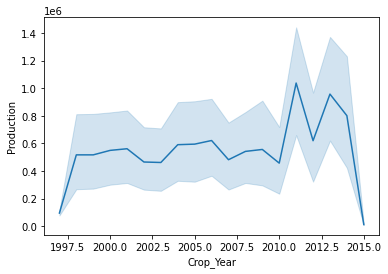

In [7]:
sns.lineplot(df['Crop_Year'],df['Production'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),
  Text(28, 0, 'Telangana '),
  Text(29

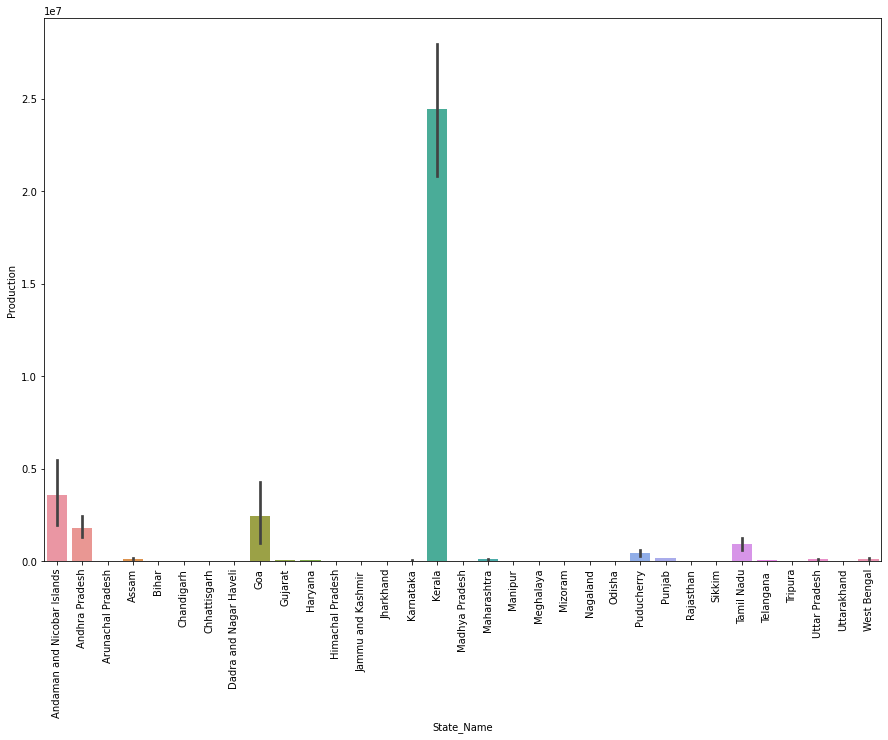

In [8]:
plt.figure(figsize=(15,10))
sns.barplot(df['State_Name'],df['Production'])
plt.xticks(rotation=90)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Production', ylabel='Season'>

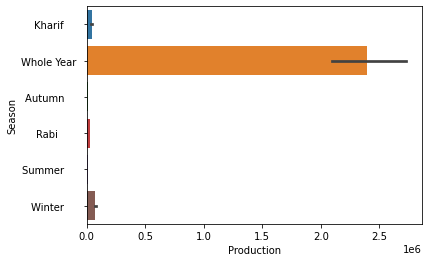

In [9]:
sns.barplot(df['Production'],df['Season'])

In [10]:
df['Crop'].value_counts().head()

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Name: Crop, dtype: int64

In [11]:
# visulisation of the top 5 crops

In [12]:
df_rice=df[df['Crop']=='Rice']
df_rice.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='Production'>

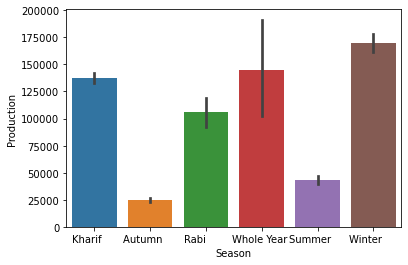

In [13]:
sns.barplot(df_rice['Season'],df_rice['Production'])

In [14]:
# Insight - production of rice is highest in winter 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),
  Text(28, 0, 'Telangana '),
  Text(29

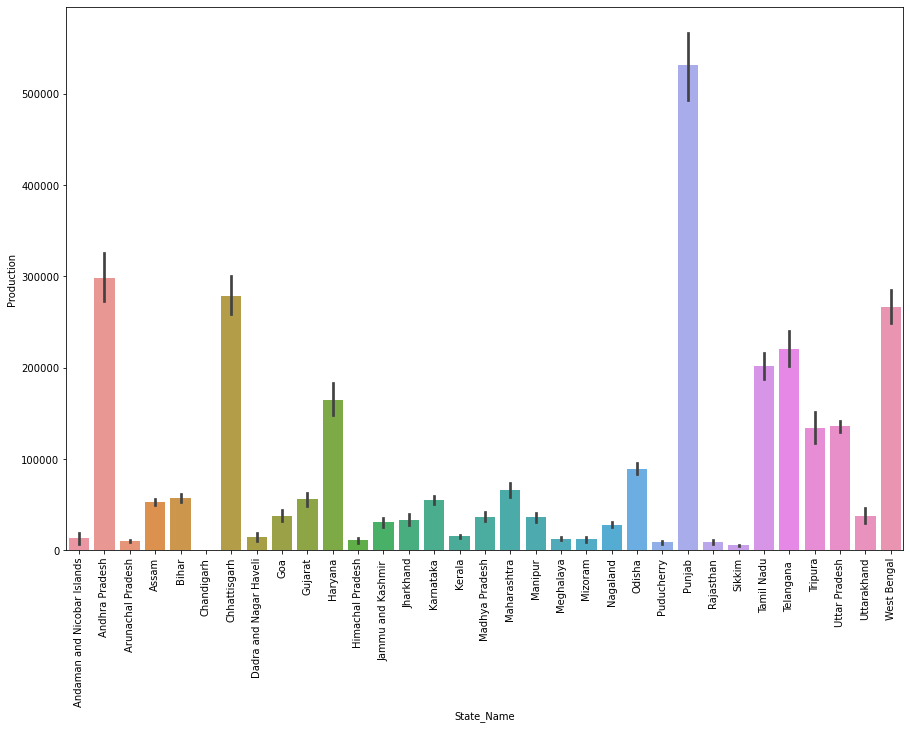

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(df_rice['State_Name'],df_rice['Production'])
plt.xticks(rotation=90)

In [16]:
# Insight- Punjab state has highest production 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


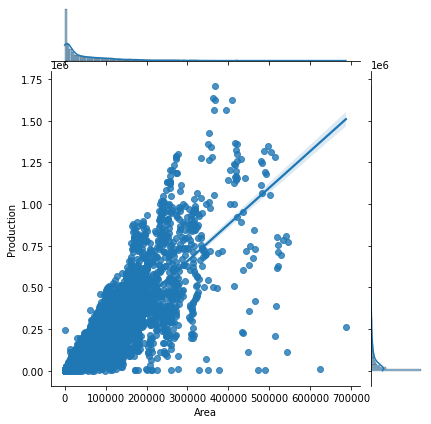

In [17]:
sns.jointplot("Area","Production",data=df_rice,kind="reg")

In [18]:
dist_rice_df=df_rice.groupby('District_Name')['Production'].sum().reset_index().sort_values(by='Production',ascending=False)

In [19]:
dist_rice_df.head()

,District_Name,Production
58,BARDHAMAN,34239976.0
374,MEDINIPUR WEST,29192719.0
612,WEST GODAVARI,27845309.0
169,EAST GODAVARI,24690929.0
494,SANGRUR,24448000.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


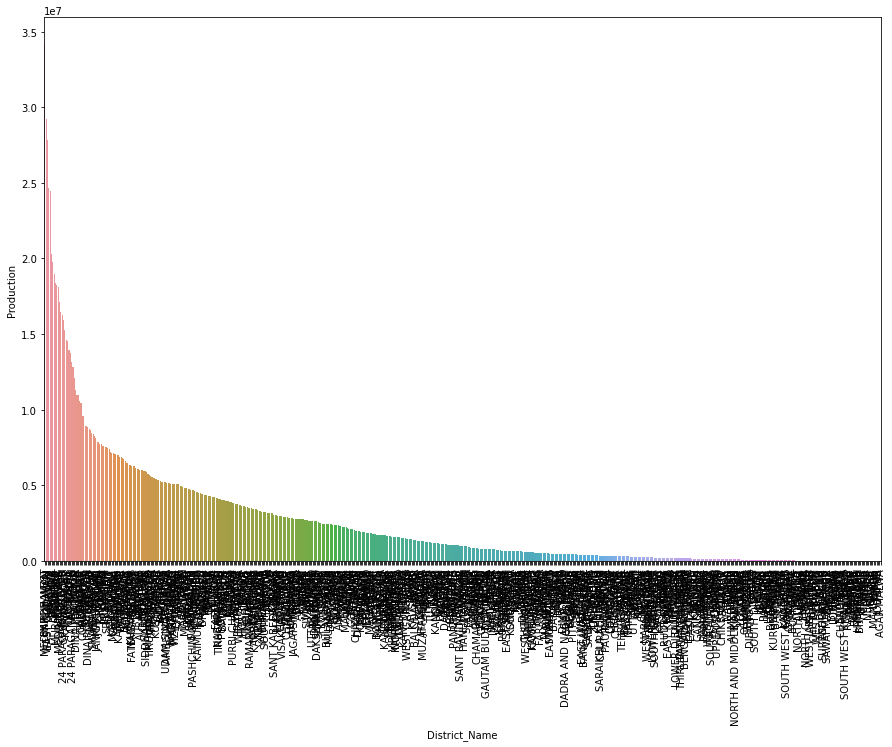

In [20]:
plt.figure(figsize=(15,10))
sns.barplot(dist_rice_df['District_Name'],dist_rice_df['Production'])
plt.xticks(rotation=90)
plt.show()

In [21]:
df_maize=df[df['Crop']=='Maize']
df_maize.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
71,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Maize,3.84,18.22
120,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2010,Rabi,Maize,86.70,96.40
194,Andaman and Nicobar Islands,SOUTH ANDAMANS,2010,Rabi,Maize,73.00,253.00
212,Andhra Pradesh,ANANTAPUR,1997,Kharif,Maize,2800.00,4900.00
226,Andhra Pradesh,ANANTAPUR,1997,Rabi,Maize,600.00,2400.00


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='Production'>

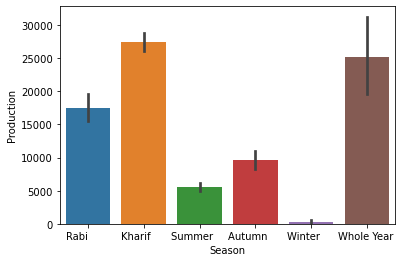

In [22]:
sns.barplot(df_maize['Season'],df_maize['Production'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Gujarat'),
  Text(9, 0, 'Haryana'),
  Text(10, 0, 'Himachal Pradesh'),
  Text(11, 0, 'Jammu and Kashmir '),
  Text(12, 0, 'Jharkhand'),
  Text(13, 0, 'Karnataka'),
  Text(14, 0, 'Kerala'),
  Text(15, 0, 'Madhya Pradesh'),
  Text(16, 0, 'Maharashtra'),
  Text(17, 0, 'Manipur'),
  Text(18, 0, 'Meghalaya'),
  Text(19, 0, 'Mizoram'),
  Text(20, 0, 'Nagaland'),
  Text(21, 0, 'Odisha'),
  Text(22, 0, 'Punjab'),
  Text(23, 0, 'Rajasthan'),
  Text(24, 0, 'Sikkim'),
  Text(25, 0, 'Tamil Nadu'),
  Text(26, 0, 'Telangana '),
  Text(27, 0, 'Tripura'),
  Text(28, 0, 'Uttar Pradesh'),
  Text(29,

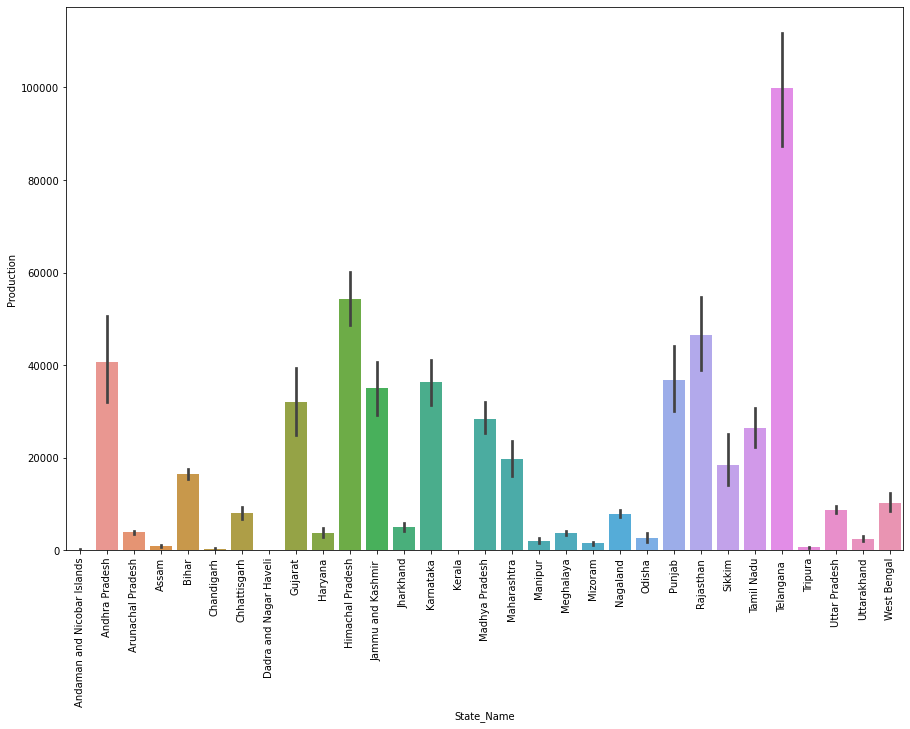

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(df_maize['State_Name'],df_maize['Production'])
plt.xticks(rotation=90)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


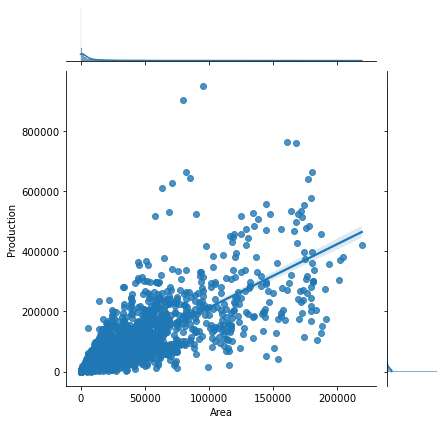

In [24]:
sns.jointplot("Area","Production",data=df_maize,kind="reg")

In [25]:
dist_maize_df=df_maize.groupby('District_Name')['Production'].sum().reset_index().sort_values(by='Production',ascending=False)

In [26]:
dist_maize_df.head()

,District_Name,Production
282,KARIMNAGAR,8320331.0
137,DAVANGERE,7496490.0
69,BELGAUM,6739811.0
210,GUNTUR,6607226.0
223,HAVERI,5469698.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


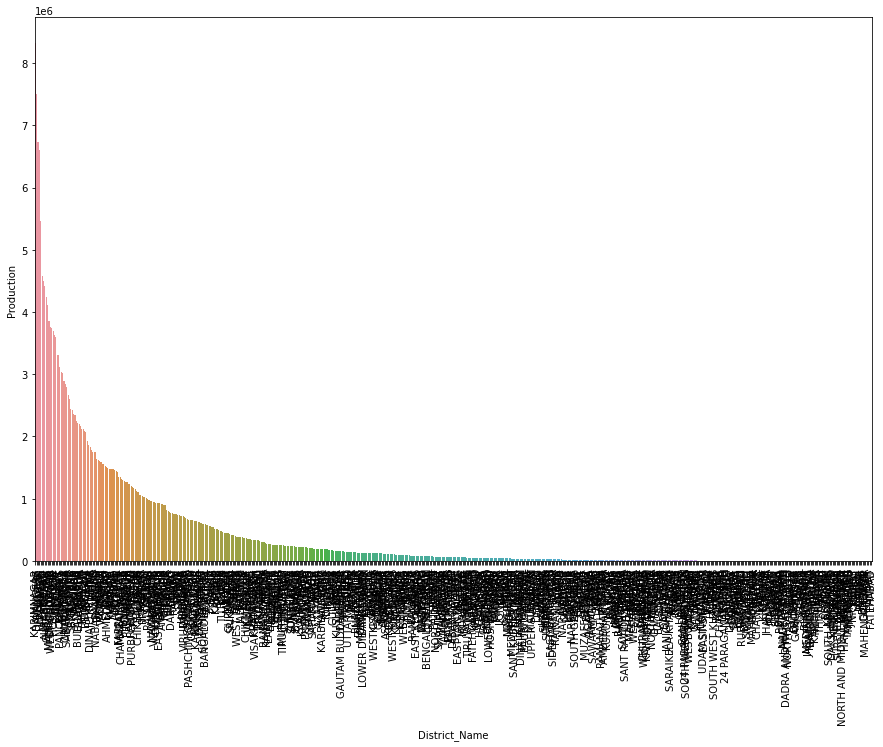

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(dist_maize_df['District_Name'],dist_maize_df['Production'])
plt.xticks(rotation=90)
plt.show()

In [28]:
df_sugar=df[df['Crop']=='Sugarcane']
df_rice.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='Production'>

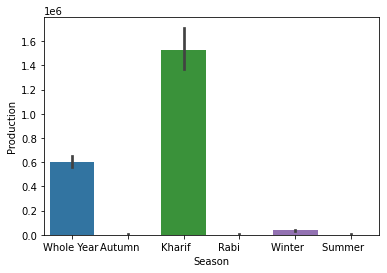

In [29]:
sns.barplot(df_sugar['Season'],df_sugar['Production'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Dadra and Nagar Haveli'),
  Text(7, 0, 'Goa'),
  Text(8, 0, 'Gujarat'),
  Text(9, 0, 'Haryana'),
  Text(10, 0, 'Himachal Pradesh'),
  Text(11, 0, 'Jammu and Kashmir '),
  Text(12, 0, 'Jharkhand'),
  Text(13, 0, 'Karnataka'),
  Text(14, 0, 'Kerala'),
  Text(15, 0, 'Madhya Pradesh'),
  Text(16, 0, 'Maharashtra'),
  Text(17, 0, 'Manipur'),
  Text(18, 0, 'Meghalaya'),
  Text(19, 0, 'Mizoram'),
  Text(20, 0, 'Nagaland'),
  Text(21, 0, 'Odisha'),
  Text(22, 0, 'Puducherry'),
  Text(23, 0, 'Punjab'),
  Text(24, 0, 'Rajasthan'),
  Text(25, 0, 'Tamil Nadu'),
  Text(26, 0, 'Telangana '),
  Text(27, 0, 'Tripura'),
  Text(28, 0, 'Uttar Pradesh'),
  Text(29, 0,

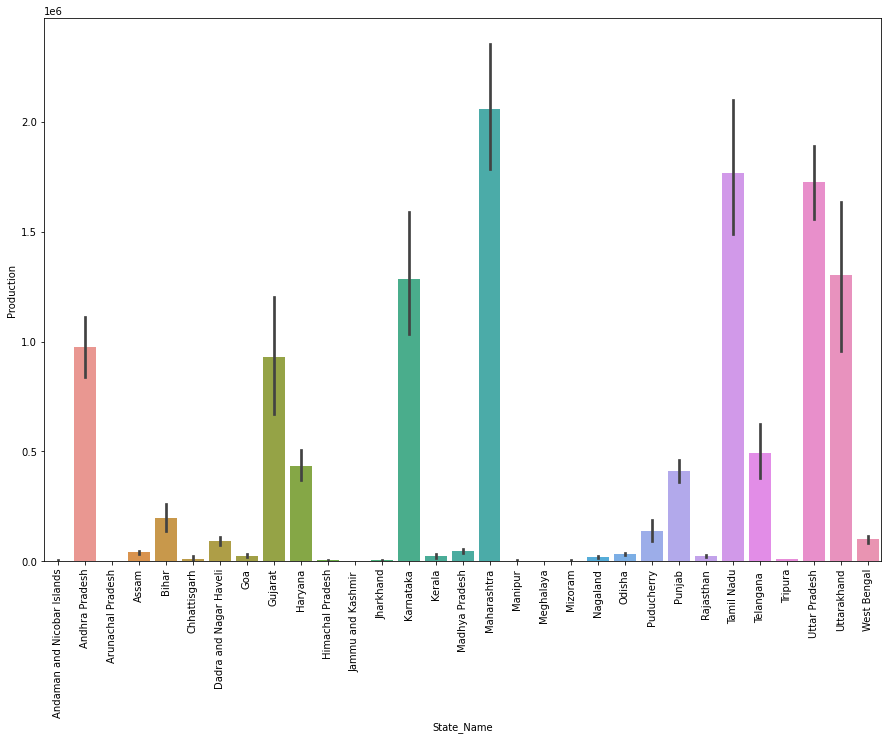

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(df_sugar['State_Name'],df_sugar['Production'])
plt.xticks(rotation=90)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


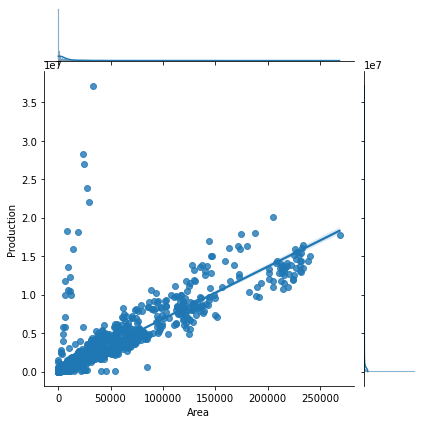

In [31]:
sns.jointplot("Area","Production",data=df_sugar,kind="reg")

In [32]:
dist_sugar_df=df_sugar.groupby('District_Name')['Production'].sum().reset_index().sort_values(by='Production',ascending=False)

In [33]:
dist_sugar_df.head()

,District_Name,Production
360,MUZAFFARNAGAR,258698795.0
81,BIJNOR,230907185.0
283,KHERI,224383685.0
63,BELGAUM,198207649.0
294,KOLHAPUR,157210426.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


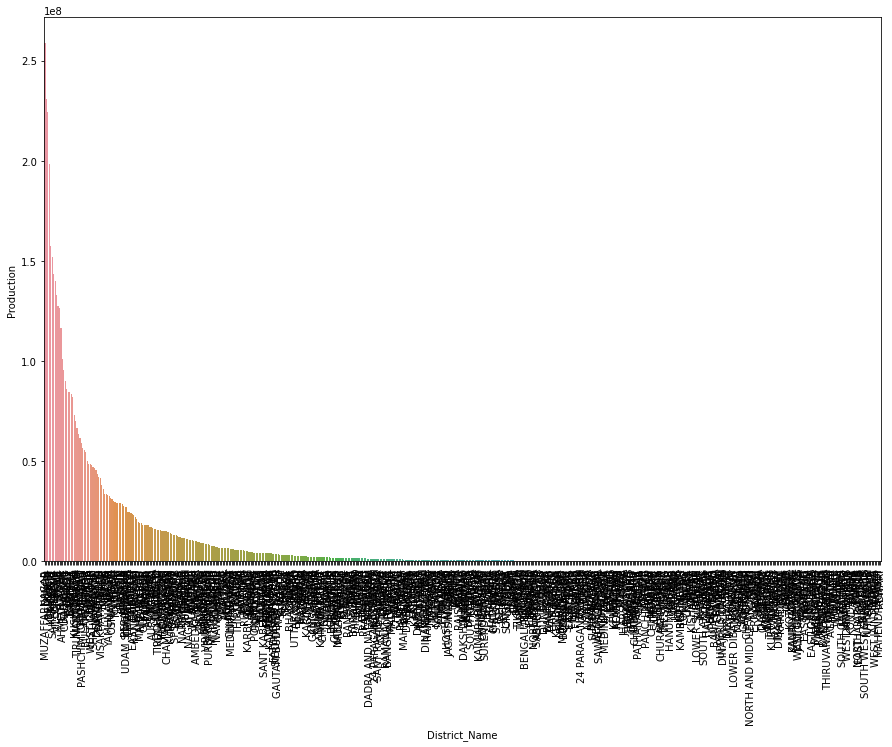

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(dist_sugar_df['District_Name'],dist_sugar_df['Production'])
plt.xticks(rotation=90)
plt.show()

In [35]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


# Feature Selection

In [36]:
df.drop(['District_Name','Crop_Year'],axis=1,inplace=True)

C:\Users\omkar\AppData\Local\Temp\ipykernel_14688\1675558016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['District_Name','Crop_Year'],axis=1,inplace=True)


In [37]:
df

,State_Name,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...
246086,West Bengal,Summer,Rice,306.0,801.0
246087,West Bengal,Summer,Sesamum,627.0,463.0
246088,West Bengal,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,Winter,Rice,279151.0,597899.0


In [38]:
df['Crop'].nunique()

124

In [39]:
df_final=pd.get_dummies(df)

In [40]:
df_final.head()

,Area,Production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,2000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,102.0,321.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,176.0,641.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,720.0,165.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242361 entries, 0 to 246090
Columns: 165 entries, Area to Crop_other oilseeds
dtypes: float64(2), uint8(163)
memory usage: 51.3 MB


In [42]:
df_final.columns=df_final.columns.str.replace(' ','')

## model creation

In [43]:
x=df_final.drop('Production',axis=1)
y=df_final['Production']

In [44]:
x.head(1).T

,0
Area,1254.0
State_Name_AndamanandNicobarIslands,1.0
State_Name_AndhraPradesh,0.0
State_Name_ArunachalPradesh,0.0
State_Name_Assam,0.0
...,...
Crop_Wheat,0.0
Crop_Yam,0.0
Crop_otherfibres,0.0
Crop_othermisc.pulses,0.0


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)

In [46]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242361 entries, 0 to 246090
Columns: 164 entries, Area to Crop_otheroilseeds
dtypes: float64(1), uint8(163)
memory usage: 49.4 MB


In [ ]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#model evaluation on traning data 
y_train_pred=linear_model.predict(x_train)
y_train_pred[0:5]

array([-1410913.07177431, -1244100.60088973, -1319187.78030207,
       -3359383.66669143,   188646.88779966])

In [ ]:
y_train[0:5]

78624      71.0
238776     43.0
245620    160.0
85958     118.0
150919     68.0
Name: Production, dtype: float64

In [ ]:
# checking the accuracy
linear_accuracy=r2_score(y_train,y_train_pred)
linear_accuracy

0.1480018007454399

In [ ]:
# model evaluation on testing data 
y_test_pred=linear_model.predict(x_test)
y_test_pred[0:5]

array([  637538.5650393 ,   417617.07353149, -1393046.88513298,
        3228131.3252092 ,   294546.88354067])

In [ ]:
y_test[0:5]

188194       4760.0
159133        780.0
86095        3383.0
163014    1242000.0
182360        131.0
Name: Production, dtype: float64

In [ ]:
# checking the accuracy
linear_accuracy_test=r2_score(y_test,y_test_pred)
linear_accuracy_test

0.1626576570980276

# Decision Tress

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
#model evaluation on traning data 
y_train_pred_dt=regressor.predict(x_train)
y_train_pred_dt[0:5]

array([ 59.  ,  64.5 , 160.  , 115.55,  68.  ])

In [ ]:
y_train[0:5]

78624      71.0
238776     43.0
245620    160.0
85958     118.0
150919     68.0
Name: Production, dtype: float64

In [ ]:
# checking the accuracy
regressor_accuracy_train_dt=r2_score(y_train,y_train_pred_dt)
regressor_accuracy_train_dt

0.9986160020825702

In [ ]:
# model evaluation on testing data 
y_test_pred_dt=regressor.predict(x_test)
y_test_pred_dt[0:5]

array([4.4720e+03, 6.7000e+02, 2.9120e+03, 1.2015e+06, 1.1000e+02])

In [ ]:
y_test[0:5]

188194       4760.0
159133        780.0
86095        3383.0
163014    1242000.0
182360        131.0
Name: Production, dtype: float64

In [ ]:
# checking the accuracy
regressor_accuracy_test_dt=r2_score(y_test,y_test_pred_dt)
regressor_accuracy_test_dt

0.8205537219341198

## Random Forest

In [ ]:
rf_model=RandomForestRegressor(random_state=35)
rf_model.fit(x_train,y_train)

In [48]:
# model evaluation for traning data 
y_train_pred_rf=rf_model.predict(x_train)
y_train_pred_rf[0:5]

array([ 62.169    ,  71.8435   , 255.49     , 121.4219381,  73.2437   ])

In [49]:
y_train[0:5]

78624      71.0
238776     43.0
245620    160.0
85958     118.0
150919     68.0
Name: Production, dtype: float64

In [50]:
# accuracy on traning data 
rf_accuracy_train=r2_score(y_train,y_train_pred_rf)
rf_accuracy_train

0.9745260230569325

In [51]:
# model Evalution on test data 
y_test_pred_rf=rf_model.predict(x_test)
y_test_pred_rf[0:5]

array([4.90569000e+03, 6.82250000e+02, 2.63952417e+03, 1.19347218e+06,
       1.11498333e+02])

In [53]:
y_test[0:5]

188194       4760.0
159133        780.0
86095        3383.0
163014    1242000.0
182360        131.0
Name: Production, dtype: float64

In [54]:
# accuracy on testing data 
rf_accuracy_test=r2_score(y_test,y_test_pred_rf)
rf_accuracy_test

0.889318027938828

In [77]:
x.columns.T[50:120]



Index(['Crop_Beans&Mutter(Vegetable)', 'Crop_BeetRoot', 'Crop_Ber',
       'Crop_Bhindi', 'Crop_BitterGourd', 'Crop_Blackpepper', 'Crop_Blackgram',
       'Crop_BottleGourd', 'Crop_Brinjal', 'Crop_Cabbage', 'Crop_Cardamom',
       'Crop_Carrot', 'Crop_Cashewnut', 'Crop_CashewnutProcessed',
       'Crop_CashewnutRaw', 'Crop_Castorseed', 'Crop_Cauliflower',
       'Crop_CitrusFruit', 'Crop_Coconut', 'Crop_Coffee', 'Crop_Colocosia',
       'Crop_Cond-spcsother', 'Crop_Coriander', 'Crop_Cotton(lint)',
       'Crop_Cowpea(Lobia)', 'Crop_Cucumber', 'Crop_DrumStick',
       'Crop_Drychillies', 'Crop_Dryginger', 'Crop_Garlic', 'Crop_Ginger',
       'Crop_Gram', 'Crop_Grapes', 'Crop_Groundnut', 'Crop_Guarseed',
       'Crop_Horse-gram', 'Crop_JackFruit', 'Crop_Jobster', 'Crop_Jowar',
       'Crop_Jute', 'Crop_Jute&mesta', 'Crop_Kapas', 'Crop_Khesari',
       'Crop_Korra', 'Crop_Lab-Lab', 'Crop_Lemon', 'Crop_Lentil',
       'Crop_Linseed', 'Crop_Litchi', 'Crop_Maize', 'Crop_Mango',
       'Crop_

In [56]:
Area=float(input("enter the area"))

array=np.zeros(164,)
array.shape
array



array[0]=Area

column_list=x.columns
name=str(input("enter the state:"))
state_name='State_Name_'+name
state_index=x.columns.get_loc(state_name)
array[state_index]=1
      
season=str(input("enter the season:"))
season_name='Season_' + season
season_index=x.columns.get_loc(season_name)
array[season_index]=1

Crop_name=str(input("enter the crop name:"))
crop= 'Crop_' + Crop_name
crop_index= x.columns.get_loc(crop)
array[crop_index]=1

array


pred=rf_model.predict([array])
pred[0]

enter the area320.0
enter the state:WestBengal
enter the season:Summer
enter the crop name:Rice


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


598.3068333333333

In [57]:
import pickle 
with open('model_yeild.pkl','wb') as file:
    pickle.dump(rf_model,file)

In [ ]:
olumns_list = x.columns
columns_list = list(columns_list).
col = {'columns':columns_list}

In [61]:
df[400:500]

,State_Name,Season,Crop,Area,Production
402,Andhra Pradesh,Rabi,Gram,54264.0,20186.0
403,Andhra Pradesh,Rabi,Groundnut,17529.0,18651.0
404,Andhra Pradesh,Rabi,Horse-gram,1859.0,688.0
405,Andhra Pradesh,Rabi,Jowar,12676.0,11497.0
406,Andhra Pradesh,Rabi,Linseed,8.0,2.0
...,...,...,...,...,...
497,Andhra Pradesh,Kharif,Dry chillies,3402.0,11288.0
498,Andhra Pradesh,Kharif,Groundnut,857823.0,684543.0
499,Andhra Pradesh,Kharif,Horse-gram,421.0,121.0
500,Andhra Pradesh,Kharif,Jowar,4300.0,5693.0


In [81]:
df['State_Name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [79]:
Crop_name='othermisc.pulses'
crop= 'Crop_' + Crop_name
crop_index= x.columns.get_loc(crop)
crop_index

162